<a href="https://colab.research.google.com/github/ThoaaPhann/AI_W11_14_04_2023/blob/main/AI_14_04_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from keras.datasets import fashion_mnist 
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, y_train.shape
x_test.shape, y_test.shape


((10000, 28, 28), (10000,))

Text(0.5, 1.0, 'So:1')

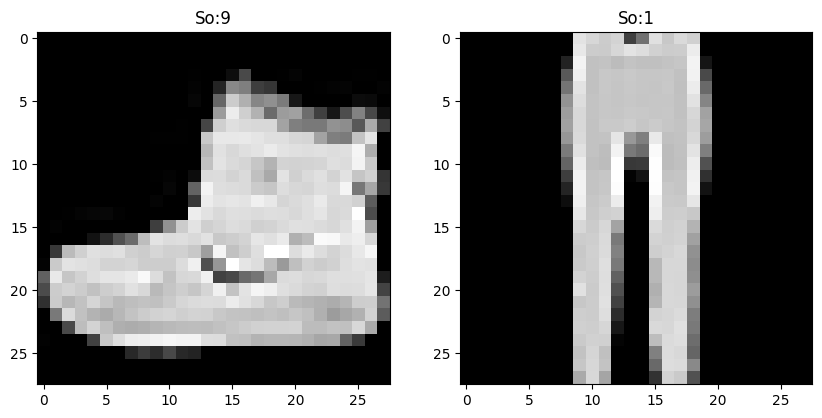

In [18]:
plt.figure(figsize = [10, 10])
plt.subplot(121)  # equivalent to: plt.subplot(1, 2, 1)
plt.imshow(x_train[0], cmap = 'gray')
plt.title('So:{}'.format(y_train[0]))

plt.subplot(122)
plt.imshow(x_train[106], cmap = 'gray')
plt.title('So:{}'.format(y_train[106]))

In [19]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [20]:
from keras.utils import to_categorical
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32') /255
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test)
y_train.shape

(60000, 10)

In [21]:
from keras import optimizers
from keras.models import Sequential 
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Normalization
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras import losses
from keras.losses import categorical_crossentropy

batch_size = 64
epochs = 20
classes = 10
loss = losses

Model = Sequential()
Model.add(Conv2D(32,kernel_size = (3,3),activation = 'linear',input_shape = (28,28,1),padding = 'same')) # 32 lan tich chap, (3,3): bo loc
Model.add(LeakyReLU(alpha = 0.1))
Model.add(MaxPooling2D((2,2),padding = 'same'))

Model.add(Conv2D(64,(3,3),activation ='linear', padding = 'same'))
Model.add(LeakyReLU(alpha = 0.1))
Model.add(MaxPooling2D((2,2),padding = 'same'))

Model.add(Conv2D(128,(3,3), activation = 'linear', padding = 'same'))
Model.add(LeakyReLU(alpha = 0.1))
Model.add(MaxPooling2D((2,2),padding = 'same'))

Model.add(Flatten())
Model.add(Dense(128, activation = 'linear')) #128: lop an, input_shape: tu dong chuyen tiep
Model.add(LeakyReLU(alpha = 0.1))
Model.add(Dense(classes,activation = 'softmax'))
Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [22]:
Model.compile(loss = loss.categorical_crossentropy, optimizer = "Adam", metrics = ['accuracy'])
train = Model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/20
938/938 [==============================] - 6s 5ms/step - loss: 0.4406 - accuracy: 0.8378
Epoch 2/20
938/938 [==============================] - 4s 5ms/step - loss: 0.2706 - accuracy: 0.9010
Epoch 3/20
938/938 [==============================] - 5s 6ms/step - loss: 0.2244 - accuracy: 0.9161
Epoch 4/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1937 - accuracy: 0.9283
Epoch 5/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1685 - accuracy: 0.9367
Epoch 6/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1463 - accuracy: 0.9454
Epoch 7/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1253 - accuracy: 0.9525
Epoch 8/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1079 - accuracy: 0.9592
Epoch 9/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0921 - accuracy: 0.9653
Epoch 10/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0808 - accuracy: 0.9698

In [24]:
Model.save('/content/drive/MyDrive/Giáo trình của 20146076/AI/AI_14_04_2023.h5')

In [25]:
eval = Model.evaluate(x_test, y_test, verbose = 0)  #verbose = 0: khong hien thi train
print('Test loss: ', eval[0])
print('Test accuracy: ', eval[1])

Test loss:  0.4384000599384308
Test accuracy:  0.9182000160217285


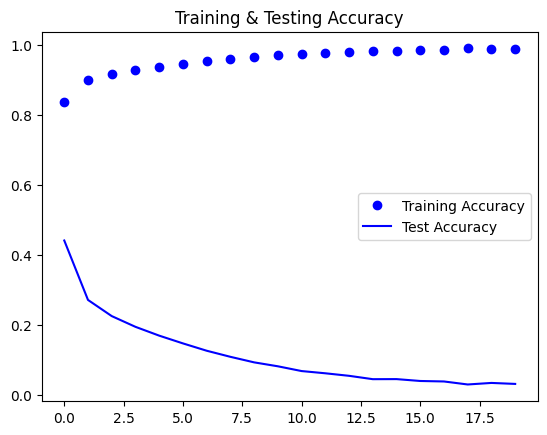

In [27]:
import matplotlib.pyplot as plt 

accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, loss, 'b', label = 'Test Accuracy')
plt.title('Training & Testing Accuracy')
plt.legend()
plt.show()